<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

> Indented block

> Indented block

-Data will be in a file Train.csv
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate
- Size of Train.csv - 60MB
- Number of rows in Train.csv = 404,290

<h3> 2.1.2 Example Data point </h3>

"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

#Importing important libraries-

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

#Reading the dataset-

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Quora_train.csv')

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


#Exploring the dataset-

In [ ]:
#Printing the shape of data to understand the total no of datapoints-
df.shape

(404290, 6)

In [ ]:
#Checking for null- 
for i in df.columns:
  print(df[i].loc[df[i].isnull()==True])

Series([], Name: id, dtype: int64)
Series([], Name: qid1, dtype: int64)
Series([], Name: qid2, dtype: int64)
363362    NaN
Name: question1, dtype: object
105780    NaN
201841    NaN
Name: question2, dtype: object
Series([], Name: is_duplicate, dtype: int64)


##Conclusion-

There are total 3 null values, 1 null value in 'question1' field and 2 null values in 'question2' field

In [ ]:
#Describing the datatypes of the columns in dataframe-
df.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [ ]:
#Describing the dataframe to get some insight-
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [ ]:
#Checking for duplicate rows-
print((df.duplicated(['question1','question2'])).loc[(df.duplicated(['question1','question2']))==True])

Series([], dtype: bool)


##Conclusion-
No duplicate rows are present


In [ ]:
#Checkng for duplicate questions-
unique_question_1=len(df['question1'].unique())
unique_question_2=len(df['question2'].unique())
duplicate_question_1=(len(df)-unique_question_1)
duplicate_question_2=(len(df)-unique_question_2)
print("Total unique questions are :",(unique_question_1+unique_question_2))
print("Total no of duplicate questions are:",(duplicate_question_1+duplicate_question_2))

Total unique questions are : 589632
Total no of duplicate questions are: 218948


In [ ]:
print(duplicate_question_1)

113833


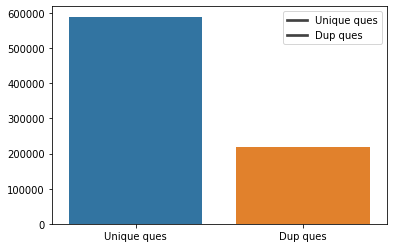

In [ ]:
#Plotting the unique and dup questions plot-
y1=unique_question_1+unique_question_2
y2=duplicate_question_1+duplicate_question_2
import seaborn as sns
sns.barplot(x=['Unique ques','Dup ques'],y=[y1,y2])
labels=['Unique ques','Dup ques']
plt.legend(labels)
plt.show()

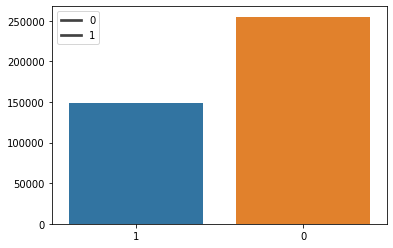

In [ ]:
#Plotting the duplicated vs non duplicated graph-
z=len(df['is_duplicate'].loc[df['is_duplicate']==1])
z1=len(df['is_duplicate'].loc[df['is_duplicate']==0])
sns.barplot(x=['1','0'],y=[z,z1])
labels=['0','1']
plt.legend(labels)
plt.show()


In [ ]:
#Plotting how many questions have come how many times-
s1=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())

In [ ]:
print(s1)

0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64


In [ ]:
s2=s1.value_counts()

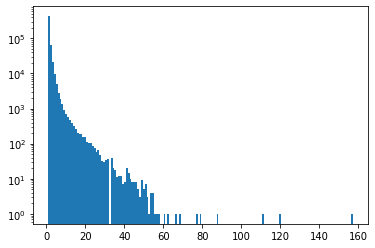

In [ ]:
#plotting the histogram-
plt.hist(s2,bins=161)
plt.yscale('log', nonposy='clip')
plt.show()

#Data Cleaning-

In [ ]:
#Presence of null value-
df.loc[(df['question1'].isnull()==True)|(df['question2'].isnull()==True)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [ ]:
#Replacing null value-
df=df.fillna('')

In [ ]:
#After null replacement-
df.loc[(df['question1'].isnull()==True)|(df['question2'].isnull()==True)]

,id,qid1,qid2,question1,question2,is_duplicate


#Feature engineering(Basic)-

In [ ]:
#1st feature would be frequency of q_ids1-
df['freq_qid1']=df.groupby('qid1')['qid1'].transform('count')
#2nd feature would be frequency of q_ids2-
df['freq_qid2']=df.groupby('qid2')['qid2'].transform('count')
#3rd feature would be q1 length-
df['q1_len']=df['question1'].apply(lambda x: len(x))
#4th feature would be q2 length-
df['q2_len']=df['question2'].apply(lambda x: len(x))
#5th feature would be num_words in q1-
df['q1_num_words']=df['question1'].apply(lambda x:len(x.split()))
#6th feature would be num_words in q2-
df['q2_num_words']=df['question2'].apply(lambda x:len(x.split()))
#7th feature would be num_common_words-
df['num_cmn_wrds']=cmn_wrd('question1','question2')
#8th feature would total_words in q1 and q2-
df['total_words']=df['q1_num_words']+df['q2_num_words']
#9th feature would be word_share-
df['word_share']=[(i/j) for i ,j in zip((df['num_cmn_wrds'].values.tolist()),(df['total_words'].values.tolist()))]
#10th feature would be freq_qid1+freq_qid2-
df['freq_qid1+freq_qid2']=df['freq_qid1']+df['freq_qid2']
#11th feature would be freq_qid1-freq_qid2-
df['freq_qid1-freq_qid2']=df['freq_qid1']-df['freq_qid2']


In [ ]:
def cmn_wrd(a,b):
  y1=df[a].apply(lambda x: set(x.split()))
  y2=y1.map(lambda x: {i.lower().strip() for i in x})
  y3=df[b].apply(lambda x: set(x.split()))
  y4=y3.map(lambda x: {i.lower().strip() for i in x})
  y7=[len(i.intersection(j)) for i,j in zip((y2.tolist()),(y4.tolist()))]
  return y7



In [ ]:
df=df.drop(['num_cmn_wrds','freq_qid1','freq_qid2','q1_len','q2_len','q1_num_words','q2_num_words','total_words'],axis=1)

In [ ]:
df['num_cmn_wrds']/df['total_words']

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_num_words,q2_num_words,num_cmn_wrds,total_words,word_share,freq_qid1+freq_qid2,freq_qid1-freq_qid2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,26,0.384615,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,21,0.190476,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,20,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20,0.100000,4,2


#Exploring the 'num_cmn_wrds' and 'word_share' as these features are probabilisticly important features-

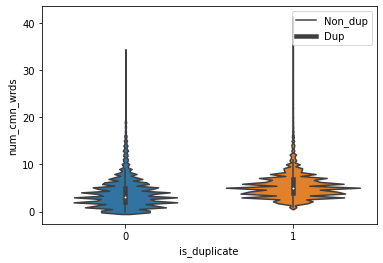

In [ ]:
#Plotting the violin plot in order to understand 'num_cmn_wrds' field's distribution-
sns.violinplot(x='is_duplicate',y='num_cmn_wrds',data=df)
labels=['Non_dup','Dup']
plt.legend(labels)
plt.show()

##Conclusion-

we can see that there is an overlap on no of common words between duplicate and non duplicate questions.

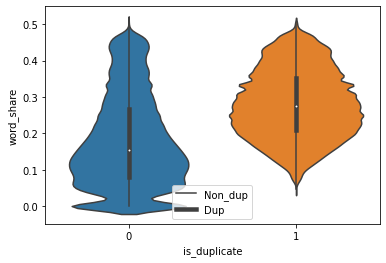

In [ ]:
#Plotting the violin plot in order to understand 'word_share' field's distribution-
sns.violinplot(x='is_duplicate',y='word_share',data=df)
labels=['Non_dup','Dup']
plt.legend(labels)
plt.show()

##Conclusion-

we can see that there is an overlap on word share between duplicate and non duplicate questions.

#Text Preprocessing-

1) Removing html tags

2) Removing double space with single spaces

3) Removing punctuations

4) Removing stopwords

5) Performing stemming

6) Doing Expand contractions

7) Remove accented words

8) Remove special characters

In [ ]:
#Removing html tags-
import re
def removing_html_tags(df_2,i):
  pattern="(</*[A-Za-z0-9]+)>+"
# s='''<html> \
#  <h1>Article Heading</h1> \
#  <p>First sentence of some important article. And another one. And then the last one</p></html>'''
  y=df_2[i].apply(lambda x: re.sub(pattern,'',str(x)))
  return removing_double_spaces(y)

In [ ]:
print(a)

  Article Heading  First sentence of some important article. And another one. And then the last one


In [ ]:
pattern="(</*[A-Za-z0-9]+)>+"
s='''<html> \
 <h1>Article Heading</h1> \
 <p>First sentence of some important article. And another one. And then the last one</p></html>'''
s2=re.sub(pattern,'',s)

In [ ]:
df_2['question1'].apply(lambda x: re.sub(pattern,'',str(x)))

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
404285    How many keywords are there in the Racket prog...
404286            Do you believe there is life after death?
404287                                    What is one coin?
404288    What is the approx annual cost of living while...
404289                What is like to have sex with cousin?
Name: question1, Length: 404290, dtype: object

In [ ]:
#Removing double spaces with single spaces
def removing_double_spaces(y):
  pattern='(\s{2})+'
  y1=y.apply(lambda x: re.sub(pattern,'',str(x)))
  return remove_punctuations(y1)

  


In [ ]:
#Removing punctuations-
import string
string.punctuation
def remove_punctuations(y1):
  d={}
  for i in string.punctuation:
    d[i]=' '
  t2={}
  for i in list(d.keys()):
    t2[ord(i)]=ord(' ')
  y2=y1.apply(lambda x: x.translate(t2))
  return lowercase_words(y2)


In [ ]:
print(t2.clear())

None


In [ ]:
print(ord('~'))

126


In [ ]:
print(s.translate(t2))
#siddharth  going $market

siddharth  going  market 


In [ ]:
#Removing stopwords- 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
l=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def lowercase_words(y2):
  y3=y2.apply(lambda x: x.split(' '))
  y4=y3.apply(lambda x: [i.lower() for i in x])
  return stemming(y4)
#def stopword_removal(y4):
  #y5=y4.apply(lambda x: [i for i in x if i not in l])
  #return 


In [ ]:
#Performing stemming-
from nltk.stem import PorterStemmer
def stemming(y4):
  ps=PorterStemmer()
  y6=y4.apply(lambda x: [ps.stem(i) for i in x])
  y7=y6.apply(lambda x : ' '.join(x))
  return contractions_1(y7)


In [ ]:
#Performing expand contractions-
import contractions
def contractions_1(y7):
  y8=y7.apply(lambda x:contractions.fix(x))
  return y8



In [ ]:
s='''Y'all can't expand contractions I'd think'''
contractions.fix(s)

'you all cannot expand contractions I would think'

In [ ]:
import re
import string
from nltk.stem import PorterStemmer
import contractions


def text_preprocessing(a,b,df_2):
  for i in [a,b]:
    print(i)
    df_2[i]=removing_html_tags(df_2,i)
  return df_2
  

    





In [ ]:
text_preprocessing('question1','question2',df_2)

question1
question2


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0
1,1,3,4,what is the stori of kohinoor koh i noor dia...,what would happen if the indian govern stole t...,0
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math 23 24 math is ...,0
4,4,9,10,which one dissolv in water quikli sugar salt ...,which fish would surviv in salt water,0
...,...,...,...,...,...,...
404285,404285,433578,379845,how mani keyword are there in the racket progr...,how mani keyword are there in perl program lan...,0
404286,404286,18840,155606,do you believ there is life after death,is it true that there is life after death,1
404287,404287,537928,537929,what is one coin,what s thi coin,0
404288,404288,537930,537931,what is the approx annual cost of live while s...,i am have littl hairfal problem but i want to ...,0


In [ ]:
df.iloc[404287]

id                         404287
qid1                       537928
qid2                       537929
question1       What is one coin?
question2       What's this coin?
is_duplicate                    0
Name: 404287, dtype: object

In [ ]:
df_2=df.copy()

In [ ]:
df_1['question1']

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
404285    How many keywords are there in the Racket prog...
404286            Do you believe there is life after death?
404287                                    What is one coin?
404288    What is the approx annual cost of living while...
404289                What is like to have sex with cousin?
Name: question1, Length: 404290, dtype: object

In [ ]:
df['question1'][1]

'What is the story of Kohinoor (Koh-i-Noor) Diamond?'

#Advanced feature creation - 

Feature 1- 
## __cwc_min__ :  Ratio of common_word_count to min length of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>

In [ ]:
#List of all stop words are stored in list l - 
#l=stopwords.words('english')
temp=df_2['question1'].apply(lambda x: [i.lower() for i in str(x).split() if i.lower() not in l])
temp_2=df_2['question2'].apply(lambda x: [j.lower() for j in str(x).split() if j.lower() not in l] )
y1=temp.apply(lambda x: set(x))
y2=temp_2.apply(lambda x: set(x))
m=[len(j.intersection(k)) for j,k in zip(y1,y2)]
data={'questions_1':temp.tolist(),'questions_2':temp_2.tolist()}
temp_3=pd.DataFrame(data=data,columns=['questions_1','questions_2'])
temp_3['min_length']=temp_3.apply(lambda x: min(len(x[0]),len(x[1])),axis=1)
temp_3['count_cmn_wrd']=m
epsilion=0.0001
temp_3['cwc_min']=temp_3[['min_length','count_cmn_wrd']].apply(lambda x:x[1]/(x[0]+epsilion),axis=1)
df_2['cwc_min']=temp_3['cwc_min'].tolist()







In [ ]:
temp_3.head()

,questions_1,questions_2,min_length,count_cmn_wrd
0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",6,5
1,"[stori, kohinoor, koh, noor, diamond]","[would, happen, indian, govern, stole, kohinoo...",5,4
2,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dn]",5,3
3,"[whi, mental, veri, lone, solv]","[find, remaind, math, 23, 24, math, divid, 24,...",5,0
4,"[one, dissolv, water, quikli, sugar, salt, met...","[fish, would, surviv, salt, water]",5,2


Feature 2- 

## __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>

In [ ]:
#List of all stop words are stored in list l - 
#l=stopwords.words('english')
temp=df_2['question1'].apply(lambda x: [i.lower() for i in str(x).split() if i.lower() not in l])
temp_2=df_2['question2'].apply(lambda x: [j.lower() for j in str(x).split() if j.lower() not in l] )
y1=temp.apply(lambda x: set(x))
y2=temp_2.apply(lambda x: set(x))
m=[len(j.intersection(k)) for j,k in zip(y1,y2)]
data={'questions_1':temp.tolist(),'questions_2':temp_2.tolist()}
temp_3=pd.DataFrame(data=data,columns=['questions_1','questions_2'])
temp_3['max_length']=temp_3.apply(lambda x: max(len(x[0]),len(x[1])),axis=1)
temp_3['count_cmn_wrd']=m
epsilion=0.0001
temp_3['cwc_max']=temp_3[['max_length','count_cmn_wrd']].apply(lambda x:x[1]/(x[0]+epsilion),axis=1)
df_2['cwc_max']=temp_3['cwc_max'].tolist()


Feature 3- 

##__csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>

In [ ]:
#List of all stop words are stored in list l - 
#l=stopwords.words('english')
temp=df_2['question1'].apply(lambda x: [i.lower() for i in str(x).split() if i.lower()  in l])
temp_2=df_2['question2'].apply(lambda x: [j.lower() for j in str(x).split() if j.lower()  in l] )
y1=temp.apply(lambda x: set(x))
y2=temp_2.apply(lambda x: set(x))
m=[len(j.intersection(k)) for j,k in zip(y1,y2)]
data={'questions_1':temp.tolist(),'questions_2':temp_2.tolist()}
temp_3=pd.DataFrame(data=data,columns=['questions_1','questions_2'])
temp_3['min_length']=temp_3.apply(lambda x: min(len(x[0]),len(x[1])),axis=1)
temp_3['count_cmn_wrd']=m
epsilion=0.0001
temp_3['csc_min']=temp_3[['min_length','count_cmn_wrd']].apply(lambda x:x[1]/(x[0]+epsilion),axis=1)
df_2['csc_min']=temp_3['csc_min'].tolist()

Feature 4- 

__csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>

In [ ]:
#List of all stop words are stored in list l - 
#l=stopwords.words('english')
temp=df_2['question1'].apply(lambda x: [i.lower() for i in str(x).split() if i.lower()  in l])
temp_2=df_2['question2'].apply(lambda x: [j.lower() for j in str(x).split() if j.lower()  in l] )
y1=temp.apply(lambda x: set(x))
y2=temp_2.apply(lambda x: set(x))
m=[len(j.intersection(k)) for j,k in zip(y1,y2)]
data={'questions_1':temp.tolist(),'questions_2':temp_2.tolist()}
temp_3=pd.DataFrame(data=data,columns=['questions_1','questions_2'])
temp_3['max_length']=temp_3.apply(lambda x: max(len(x[0]),len(x[1])),axis=1)
temp_3['count_cmn_wrd']=m
epsilion=0.0001
temp_3['csc_max']=temp_3[['max_length','count_cmn_wrd']].apply(lambda x:x[1]/(x[0]+epsilion),axis=1)
df_2['csc_max']=temp_3['csc_max'].tolist()

Feature 5- 

__ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

In [ ]:
temp=df_2['question1'].apply(lambda x: [i.lower() for i in str(x).split()])
temp_2=df_2['question2'].apply(lambda x: [j.lower() for j in str(x).split()] )
y1=temp.apply(lambda x: set(x))
y2=temp_2.apply(lambda x: set(x))
m=[len(j.intersection(k)) for j,k in zip(y1,y2)]
data={'questions_1':temp.tolist(),'questions_2':temp_2.tolist()}
temp_3=pd.DataFrame(data=data,columns=['questions_1','questions_2'])
temp_3['min_length']=temp_3.apply(lambda x: min(len(x[0]),len(x[1])),axis=1)
temp_3['count_cmn_wrd']=m
epsilion=0.0001
temp_3['ctc_min']=temp_3[['min_length','count_cmn_wrd']].apply(lambda x:x[1]/(x[0]+epsilion),axis=1)
df_2['ctc_min']=temp_3['ctc_min'].tolist()

Feature 6- 

__ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>

In [ ]:
temp=df_2['question1'].apply(lambda x: [i.lower() for i in str(x).split()])
temp_2=df_2['question2'].apply(lambda x: [j.lower() for j in str(x).split()] )
y1=temp.apply(lambda x: set(x))
y2=temp_2.apply(lambda x: set(x))
m=[len(j.intersection(k)) for j,k in zip(y1,y2)]
data={'questions_1':temp.tolist(),'questions_2':temp_2.tolist()}
temp_3=pd.DataFrame(data=data,columns=['questions_1','questions_2'])
temp_3['max_length']=temp_3.apply(lambda x: max(len(x[0]),len(x[1])),axis=1)
temp_3['count_cmn_wrd']=m
epsilion=0.0001
temp_3['ctc_max']=temp_3[['max_length','count_cmn_wrd']].apply(lambda x:x[1]/(x[0]+epsilion),axis=1)
df_2['ctc_max']=temp_3['ctc_max'].tolist()

Feature 7- 

__last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

In [ ]:
temp=df_2['question1'].apply(lambda x: [i.lower() for i in str(x).split()])
temp_2=df_2['question2'].apply(lambda x: [j.lower() for j in str(x).split()] )
data={'questions_1':temp.tolist(),'questions_2':temp_2.tolist()}
temp_3=pd.DataFrame(data=data,columns=['questions_1','questions_2'])
df_2['last_word_eq']=temp_3[['questions_1','questions_2']].apply(lambda x :int(x[0][::-1][:1]==x[1][::-1][:1]),axis=1)

Feature 8 - 

__first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>

In [ ]:
temp=df_2['question1'].apply(lambda x: [i.lower() for i in str(x).split()])
temp_2=df_2['question2'].apply(lambda x: [j.lower() for j in str(x).split()] )
data={'questions_1':temp.tolist(),'questions_2':temp_2.tolist()}
temp_3=pd.DataFrame(data=data,columns=['questions_1','questions_2'])
df_2['first_word_eq']=temp_3[['questions_1','questions_2']].apply(lambda x :int(x[0][:][:1]==x[1][:][:1]),axis=1)

Feature 9- 

__abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

In [ ]:
temp=df_2['question1'].apply(lambda x: [i.lower() for i in str(x).split()])
temp_2=df_2['question2'].apply(lambda x: [j.lower() for j in str(x).split()] )
data={'questions_1':temp.tolist(),'questions_2':temp_2.tolist()}
temp_3=pd.DataFrame(data=data,columns=['questions_1','questions_2'])
df_2['abs_len_diff']=temp_3[['questions_1','questions_2']].apply(lambda x :abs(len(x[0])-len(x[1])),axis=1)

Feature 10- 

__mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


In [ ]:
temp=df_2['question1'].apply(lambda x: [i.lower() for i in str(x).split()])
temp_2=df_2['question2'].apply(lambda x: [j.lower() for j in str(x).split()] )
data={'questions_1':temp.tolist(),'questions_2':temp_2.tolist()}
temp_3=pd.DataFrame(data=data,columns=['questions_1','questions_2'])
df_2['mean_len']=temp_3[['questions_1','questions_2']].apply(lambda x :((len(x[0])+len(x[1]))/2),axis=1)

Feature 11- 

__fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
df_2['fuzz_ratio']=df_2[['question1','question2']].apply(lambda x: fuzz.ratio(x[0],x[1]),axis=1)

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



Feature 12- 

__fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

In [ ]:
df_2['fuzz_partial_ratio']=df_2[['question1','question2']].apply(lambda x: fuzz.partial_ratio(x[0],x[1]),axis=1)

Feature 13-

__token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

In [ ]:
df_2['token_sort_ratio']=df_2[['question1','question2']].apply(lambda x: fuzz.token_sort_ratio(x[0],x[1]),axis=1)

Feature 14-

__token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

In [ ]:
df_2['token_set_ratio']=df_2[['question1','question2']].apply(lambda x: fuzz.token_set_ratio(x[0],x[1]),axis=1)

Feature 15-

__longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))

In [ ]:
pip install distance
import distance
z=temp_3[['questions_1','questions_2']].apply(lambda x:list(distance.lcsubstrings(str(x[0]).strip(),str(x[1]).strip())),axis=1)
z1=z.apply (lambda x : len(x[0]) if x else 0)
temp_3['lngst_cmn_subs']=z.tolist()
temp_3["lngst_cmn_subs_len"]=z1.tolist()
temp_3['lngst_cmn_subs_ratio']=temp_3[['questions_1','questions_2','lngst_cmn_subs','lngst_cmn_subs_len']].apply(lambda x: x[3]/(min(len(str(x[0])),len(str(x[1])))+1),axis=1)
df_2['longest_substr_ratio']=temp_3['lngst_cmn_subs_ratio'].tolist()
df_2['longest_substr_ratio']=temp_3['lngst_cmn_subs_ratio'].tolist()

In [ ]:
df_2.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,0.833319,0.714276,0.999983,0.857131,0.916659,0.785709,0,1,2,13.0,93,100,92,100,0.964912
1,1,3,4,what is the stori of kohinoor koh i noor dia...,what would happen if the indian govern stole t...,0,0.799984,0.399996,0.599988,0.599988,0.699993,0.466664,0,1,5,12.5,68,73,65,86,0.576923
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,0,1,4,12.0,42,46,64,73,0.185185
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math 23 24 math is ...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,2,12.0,23,27,27,31,0.043478
4,4,9,10,which one dissolv in water quikli sugar salt ...,which fish would surviv in salt water,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0,1,6,10.0,36,55,49,68,0.153846


In [ ]:
df_2.shape

(404290, 21)

In [ ]:
#Saving the dataframe to a .csv file for later use- 
file='/content/drive/MyDrive/quora_pair_similarity'
df_2.to_csv(file)

#Analyzing the newely created fetaures are important or not - 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


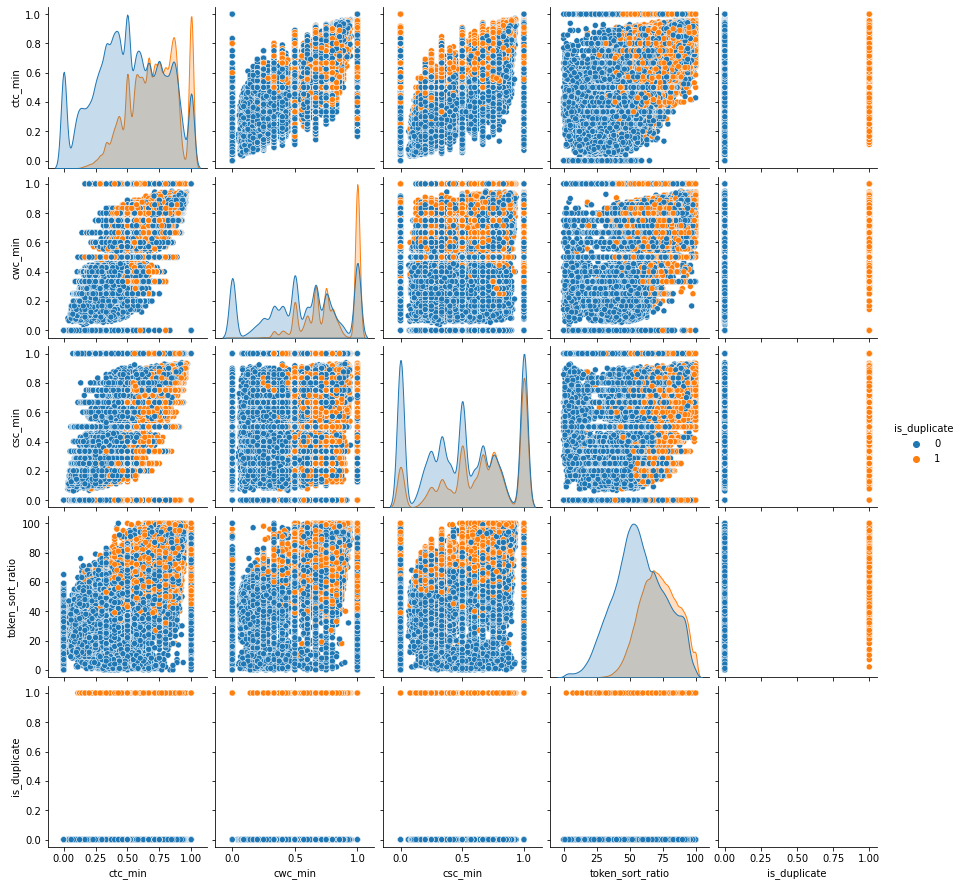

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.pairplot(data=df_2,hue='is_duplicate',vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate'],
            )
plt.show()

##Conclusion-

By plotting a pair plot we can see that some of the adv features that we have added is providing us the value in order to seperate points belonging to duplicate and non duplicate questions. such as ctc min, cwc min , token_sort_ratio etc

#Creating Word Cloud- 

In [ ]:
# Using wordcloud in order to see the words that are mostly there in duplicate and non duplicate questions-
#Stopwords in list l-
l=set(l)
l.add("said")
l.add("br")
l.add(" ")
#stopwords.remove("good")
#stopwords.remove("love")
#stopwords.remove("best")
#stopwords.remove("!")
#Creating list of all questions both q1 and g2 that does not belong to duplicate class- 
z=(df_2['question1'].loc[df_2['is_duplicate']==0].tolist())+(df_2['question2'].loc[df_2['is_duplicate']==0].tolist())


In [ ]:
print(len(z))

510054


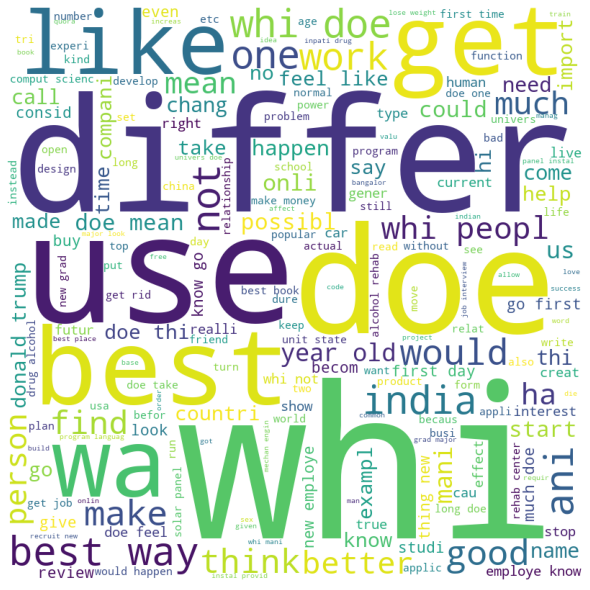

In [ ]:
#Creating wordcloud for non duplicate questions- 

# importing all necessery modules
from wordcloud import WordCloud


comment_words = ''
stopwords = l

# iterate through the csv file
for val in z:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
#Concating all the questins from q1 and q2 which are duplicate in a single list- 
z=(df_2['question1'].loc[df_2['is_duplicate']==1].tolist())+(df_2['question2'].loc[df_2['is_duplicate']==1].tolist())


In [ ]:
print(len(z))

298526


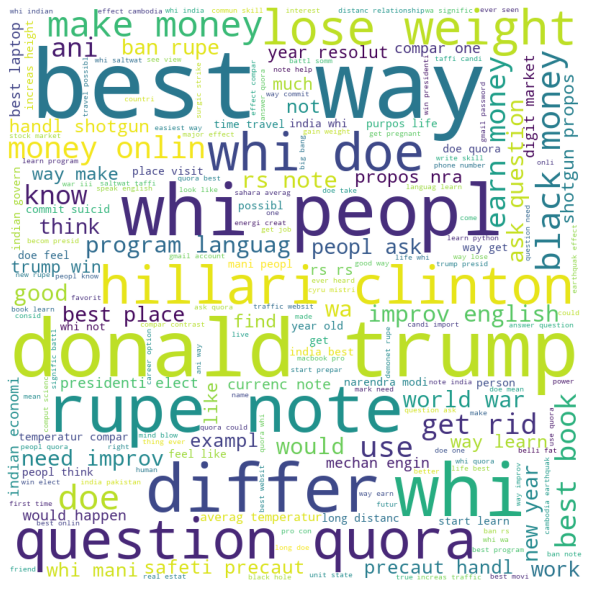

In [ ]:
#Creating wordcloud for non duplicate questions- 

# importing all necessery modules
from wordcloud import WordCloud


comment_words = ''
stopwords = l

# iterate through the csv file
for val in z:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##Conclusion-

we can see there are some words which occurs as much in duplicate class as compared to non duplicate class, Hence we can conclude that word importance plays an role in classsifying words to duplicate and non duplicate classs respectively

#Converting q1 and q2 into vector form using tfidf weighted w2v- 

In [ ]:
import pickle
pickle_in = open("/content/drive/MyDrive/glove_vectors","rb")
w2v_glove=pickle.load(pickle_in)


In [ ]:
#computing tfidf weighted w2v for question 1- 

from sklearn.feature_extraction.text import TfidfVectorizer
clf=TfidfVectorizer(stop_words=list(l))
question_2_tfidf=clf.fit(df_4['question1'])

In [ ]:
vocab=[ i for i in list(question_2_tfidf.vocabulary_.keys())]
idf=[j for j in list(question_2_tfidf.idf_)]

In [ ]:
df_4['question2']=df_4['question2'].fillna(' ')

In [ ]:
model={}
for i,j in zip(vocab,idf):
  model[i]=j

In [ ]:
model_vocab=[k for k in list(w2v_glove.keys())]

In [ ]:
print(model_vocab[:10])

['mallinson', 'respirometer', 'williston', 'stayed', 'enthusiasm', 'cardwell', 'fayetteville', 'bicycle', 'tornados', 'parc']


In [ ]:
from tqdm import *
tfidf_weighed_w2v=[]
for i in tqdm(df_4['question1']):
  weighted_w2v=np.zeros(300)
  tfidf=0
  for j in i.split():
    if ((j in vocab) and (j in model_vocab)):
      w2v=w2v_glove[j]
      idf=model[j]
      tf= i.split().count(j)/len(i.split())
      tfidf=tfidf+(tf*idf)
      weighted_w2v+=w2v*tf*idf
    tfidf_weighed_w2v.append(weighted_w2v/tfidf)

print(len(tfidf_weighed_w2v))
print(len(tfidf_weighed_w2v[0]))  
  




In [ ]:
#computing tfidf weighted w2v for question 2- 

from sklearn.feature_extraction.text import TfidfVectorizer
clf=TfidfVectorizer(stop_words=list(l))
question_2_tfidf=clf.fit(df_4['question2'])

In [ ]:
vocab=[ i for i in list(question_2_tfidf.vocabulary_.keys())]
idf=[j for j in list(question_2_tfidf.idf_)]

395760


In [ ]:
file='/content/drive/MyDrive/quora_pair_similarity_question_1_vector'

pickle_in=open(file,'wb')
pickle.dump(tfidf_weighed_w2v,pickle_in)

In [ ]:
print(tfidf_weighed_w2v[:100])

[array([-2.39421366e-03,  2.32521110e-01, -5.99350040e-02,  1.08540623e-01,
        1.09502714e-01, -6.13636016e-02, -2.89403819e+00,  6.52822428e-01,
       -1.56961382e-01,  1.07641518e-01, -3.28247825e-01,  2.14709415e-02,
        9.69002775e-02, -2.08844418e-01,  9.93442390e-02, -6.81999231e-03,
        9.95887751e-02, -1.22266780e-01, -2.65313027e-01,  1.16616145e-02,
        7.28016153e-02,  1.10686218e-01,  5.41168246e-02,  1.24266375e-01,
        1.04974729e-01,  1.43227985e-01,  1.21798026e-01,  1.52980339e-01,
        1.93734305e-01, -5.81027490e-02, -3.78901932e-01, -8.87840932e-02,
        1.85348291e-01,  8.34482424e-03,  6.72616239e-02,  1.59981425e-01,
       -1.42983453e-01, -1.24191642e-02,  5.38055311e-02,  1.26241639e-01,
       -3.62026855e-02, -2.05835957e-01,  1.19951033e-01,  4.41403414e-02,
       -2.73168966e-01,  7.68156589e-02,  2.81601881e-01, -5.81629740e-03,
        1.12306047e-01, -3.92646268e-01,  9.24799952e-02,  2.39596297e-01,
        2.22988763e-01, 

In [ ]:
df_2['question1']=df_2['question1'].fillna(' ')

In [ ]:
z=df_2['question1'].loc[df_2['question1'].isnull()==True]

In [ ]:
df_4=pd.read_csv('/content/drive/MyDrive/quora_pair_similarity')

In [ ]:
df_4.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,longest_substr_ratio
0,0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,0.833319,0.714276,0.999983,0.857131,0.916659,0.785709,0,1,2,13.0,93,100,92,100,0.964912
1,1,1,3,4,what is the stori of kohinoor koh i noor dia...,what would happen if the indian govern stole t...,0,0.799984,0.399996,0.599988,0.599988,0.699993,0.466664,0,1,5,12.5,68,73,65,86,0.576923
2,2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,0,1,4,12.0,42,46,64,73,0.185185
3,3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math 23 24 math is ...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,2,12.0,23,27,27,31,0.043478
4,4,4,9,10,which one dissolv in water quikli sugar salt ...,which fish would surviv in salt water,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0,1,6,10.0,36,55,49,68,0.153846


In [ ]:
df_4=df_4.drop('Unnamed: 0',axis=1)

In [ ]:
df_4.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,0.833319,0.714276,0.999983,0.857131,0.916659,0.785709,0,1,2,13.0,93,100,92,100,0.964912
1,1,3,4,what is the stori of kohinoor koh i noor dia...,what would happen if the indian govern stole t...,0,0.799984,0.399996,0.599988,0.599988,0.699993,0.466664,0,1,5,12.5,68,73,65,86,0.576923
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,0,1,4,12.0,42,46,64,73,0.185185
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math 23 24 math is ...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,2,12.0,23,27,27,31,0.043478
4,4,9,10,which one dissolv in water quikli sugar salt ...,which fish would surviv in salt water,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0,1,6,10.0,36,55,49,68,0.153846


363362

#Now creating a dataset - 



In [ ]:
import pandas as pd

df_5=pd.read_csv('/content/drive/MyDrive/Copy of final_features.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_5.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,...,344_y,345_y,346_y,347_y,348_y,349_y,350_y,351_y,352_y,353_y,354_y,355_y,356_y,357_y,358_y,359_y,360_y,361_y,362_y,363_y,364_y,365_y,366_y,367_y,368_y,369_y,370_y,371_y,372_y,373_y,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,121.929927,100.083900,72.497894,115.641800,-48.370870,34.619058,-172.057787,-92.502617,113.223315,50.562441,38.575120,...,-14.608611,-14.153514,-29.568828,29.144799,41.087017,-6.711498,-8.812467,7.906522,-27.432420,10.599943,16.952886,-15.785523,-18.361750,-23.125756,-7.145598,-15.993189,-0.493609,3.726502,25.448065,16.128444,-27.806874,-2.436932,5.134369,-8.074996,24.421846,8.739254,-17.285154,13.440285,-13.209145,1.079919,16.165592,33.030668,7.019996,-14.793959,15.437511,8.199658,-25.070834,1.571619,1.603738,0.305645
1,1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,-78.070939,54.843781,82.738482,98.191872,-51.234859,55.013510,-39.140730,-82.692352,45.161489,-9.556289,-79.721632,...,-1.663620,-0.402938,-14.087219,38.538202,9.727834,13.917810,-22.559171,6.881677,-27.182516,23.088673,24.731105,11.367434,6.593838,-24.493328,-19.296450,-33.008435,-26.038134,24.669903,27.983948,1.638938,-24.155492,-9.086083,1.414648,8.240657,8.082218,16.568080,2.114171,1.494281,17.547449,-7.709981,-4.901128,-4.565393,41.520751,-0.727564,-16.413776,-7.373778,2.638877,-7.403457,2.703070,0.408040
2,2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,-5.355015,73.671810,14.376365,104.130241,1.433537,35.229116,-148.519385,-97.124595,41.972195,50.948731,52.444493,...,-8.954575,-15.803814,-5.150883,17.270690,14.479286,-8.041332,-37.765046,8.256755,-37.232596,0.989206,11.408972,-3.191425,-12.339837,-24.161270,-10.353968,-28.326909,-12.874845,6.732092,8.607652,0.745432,-25.891975,-9.892551,-6.407806,-1.322369,15.972339,17.672533,-9.950780,0.094202,-13.221513,-14.747519,8.359966,-2.165985,10.936580,-16.531660,14.681230,15.633759,-1.210901,14.183826,11.703135,10.148075
3,3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,5.778359,-34.712038,48.999631,59.699204,40.661263,-41.658731,-36.808594,24.170655,0.235600,-29.407290,-62.898284,...,-11.371908,-3.578342,-2.376237,20.909671,3.221330,-8.993710,-12.933957,0.584045,-15.961217,2.370193,9.618801,5.654456,-4.039893,-19.908457,-11.321396,-24.859472,-13.069850,9.953773,-1.694113,4.442514,-9.278886,-3.784161,8.152649,7.866912,8.705768,8.401290,-3.039061,10.259952,-8.754181,-7.158578,3.311411,3.788879,13.398598,-6.592596,6.437365,5.993293,2.732392,-3.727647,5.614115,6.023693
4,4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,51.138220,38.587312,123.639488,53.333041,-47.062739,37.356212,-298.722753,-106.421119,106.248914,65.880707,203.339632,...,-11.345449,6.101218,-23.438455,24.105925,10.318461,-0.063605,-1.480551,6.154874,-14.630949,19.905604,2.042963,-3.555425,-1.255108,-8.036084,-9.766769,-16.191164,-8.790663,4.519232,12.908963,10.736240,-24.625240,-19.771682,7.144672,8.497629,17.803612,5.478965,-10.447376,6.479129,-2.375045,-5.082603,-2.403870,11.991204,8.088483,-15.090201,8.375166,1.727225,-6.601129,11.317413,11.544603,2.478689


#Doing Train- Test split- 

In [ ]:
Y=df_5['is_duplicate']

In [ ]:
df_5=df_5.drop('is_duplicate',axis=1)

In [ ]:
df_5=df_5.drop('Unnamed: 0',axis=1)

In [ ]:
df_5.head()

,id,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,...,344_y,345_y,346_y,347_y,348_y,349_y,350_y,351_y,352_y,353_y,354_y,355_y,356_y,357_y,358_y,359_y,360_y,361_y,362_y,363_y,364_y,365_y,366_y,367_y,368_y,369_y,370_y,371_y,372_y,373_y,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,121.929927,100.083900,72.497894,115.641800,-48.370870,34.619058,-172.057787,-92.502617,113.223315,50.562441,38.575120,-27.622444,-21.129949,...,-14.608611,-14.153514,-29.568828,29.144799,41.087017,-6.711498,-8.812467,7.906522,-27.432420,10.599943,16.952886,-15.785523,-18.361750,-23.125756,-7.145598,-15.993189,-0.493609,3.726502,25.448065,16.128444,-27.806874,-2.436932,5.134369,-8.074996,24.421846,8.739254,-17.285154,13.440285,-13.209145,1.079919,16.165592,33.030668,7.019996,-14.793959,15.437511,8.199658,-25.070834,1.571619,1.603738,0.305645
1,1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,-78.070939,54.843781,82.738482,98.191872,-51.234859,55.013510,-39.140730,-82.692352,45.161489,-9.556289,-79.721632,25.818640,-7.883405,...,-1.663620,-0.402938,-14.087219,38.538202,9.727834,13.917810,-22.559171,6.881677,-27.182516,23.088673,24.731105,11.367434,6.593838,-24.493328,-19.296450,-33.008435,-26.038134,24.669903,27.983948,1.638938,-24.155492,-9.086083,1.414648,8.240657,8.082218,16.568080,2.114171,1.494281,17.547449,-7.709981,-4.901128,-4.565393,41.520751,-0.727564,-16.413776,-7.373778,2.638877,-7.403457,2.703070,0.408040
2,2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,-5.355015,73.671810,14.376365,104.130241,1.433537,35.229116,-148.519385,-97.124595,41.972195,50.948731,52.444493,-45.197928,74.042597,...,-8.954575,-15.803814,-5.150883,17.270690,14.479286,-8.041332,-37.765046,8.256755,-37.232596,0.989206,11.408972,-3.191425,-12.339837,-24.161270,-10.353968,-28.326909,-12.874845,6.732092,8.607652,0.745432,-25.891975,-9.892551,-6.407806,-1.322369,15.972339,17.672533,-9.950780,0.094202,-13.221513,-14.747519,8.359966,-2.165985,10.936580,-16.531660,14.681230,15.633759,-1.210901,14.183826,11.703135,10.148075
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,5.778359,-34.712038,48.999631,59.699204,40.661263,-41.658731,-36.808594,24.170655,0.235600,-29.407290,-62.898284,-94.979633,24.331771,...,-11.371908,-3.578342,-2.376237,20.909671,3.221330,-8.993710,-12.933957,0.584045,-15.961217,2.370193,9.618801,5.654456,-4.039893,-19.908457,-11.321396,-24.859472,-13.069850,9.953773,-1.694113,4.442514,-9.278886,-3.784161,8.152649,7.866912,8.705768,8.401290,-3.039061,10.259952,-8.754181,-7.158578,3.311411,3.788879,13.398598,-6.592596,6.437365,5.993293,2.732392,-3.727647,5.614115,6.023693
4,4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,51.138220,38.587312,123.639488,53.333041,-47.062739,37.356212,-298.722753,-106.421119,106.248914,65.880707,203.339632,-160.598199,7.764019,...,-11.345449,6.101218,-23.438455,24.105925,10.318461,-0.063605,-1.480551,6.154874,-14.630949,19.905604,2.042963,-3.555425,-1.255108,-8.036084,-9.766769,-16.191164,-8.790663,4.519232,12.908963,10.736240,-24.625240,-19.771682,7.144672,8.497629,17.803612,5.478965,-10.447376,6.479129,-2.375045,-5.082603,-2.403870,11.991204,8.088483,-15.090201,8.375166,1.727225,-6.601129,11.317413,11.544603,2.478689


In [ ]:
#Doing a train and test split- 
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(df_5,Y,test_size=0.30, train_size=0.70,stratify=Y)

In [ ]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(283003, 795)
(121287, 795)
(283003,)
(121287,)


#Now creating a random model in order to get the upper limit of performance matrix-

In [ ]:
import random
import numpy as np
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
y_predicted=np.zeros((len(X_Test),2))
y_predicted_upd=[]
for j in range(len(X_Test)):
  k=np.random.rand(1,2)
  y_predicted[j]=(k/np.sum(k,axis=1))
#Computing log loss of random model in order to get an idea of the performance matrix's threshold- 
print("Logloss of random model is:", log_loss(Y_Test,y_predicted))


#Calculating the predicted target variable of random model-  
y_predicted_upd=np.argmax(y_predicted,axis=1)


#Computing Confusion Matrix of random model- 
C=confusion_matrix(Y_Test,y_predicted_upd)






Logloss of random model is: 0.8893794728157949


In [ ]:
print(C)

#tn, fp, fn, tp 

[[38069 38439]
 [22448 22331]]


In [ ]:
Precision_matrix=C/C.sum(axis=1)

In [ ]:
Recall_matrix=((C.T)/C.sum(axis=1)).T

In [ ]:
print(Precision_matrix)

[[0.49758195 0.85841578]
 [0.29340723 0.49869358]]


In [ ]:
print(Recall_matrix)

[[0.49758195 0.50241805]
 [0.50130642 0.49869358]]


##Creating heatmap- 

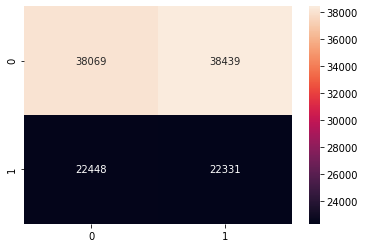

In [ ]:
#Confusion matrix- 
import seaborn as sns
sns.heatmap(C,annot=True,fmt="d")


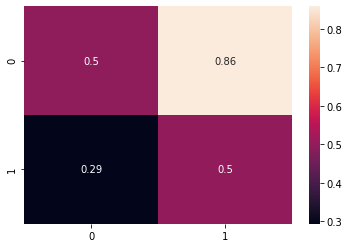

In [ ]:
#Precision Matrix- 
sns.heatmap(Precision_matrix,annot=True)


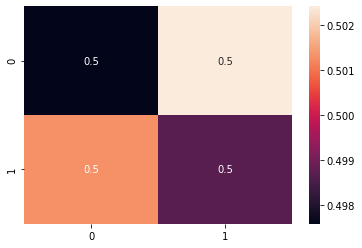

In [ ]:
#Recall Matrix-
sns.heatmap(Recall_matrix,annot=True)

#Training the model -

## 1st model is Logistic regression-


In [ ]:
#Computing test loss-
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
C1=[10**i for i in range(-5,2)]
log_loss1=[]
for j in C1:
  clf=LogisticRegression(C=j,random_state=42)
  clf1=clf.fit(X_Train,Y_Train)
  calibarated=CalibratedClassifierCV(clf)
  calibarated1=calibarated.fit(X_Train,Y_Train)
  calibarated2=calibarated.predict_proba(X_Test)

  log_loss1.append(log_loss(Y_Test,calibarated2))
  


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
#Creating a dictionary to hold key as "C" and value as "log_loss"
d={}
for i in (C1):
  d[i]=log_loss1[C1.index(i)]

In [ ]:
print(log_loss1)

[0.5645306781435179, 0.5649303147431732, 0.5674755485393346, 0.5664644538000032, 0.5676631038931254, 0.5680802115713398, 0.567070089070669]


In [ ]:
#Printing the optimal value of C
print("Optimal value of C that gives the lowest log loss is:",sorted(d.items(),key=(lambda x: (x[1],x[0])))[0][0])

Optimal value of C that gives the lowest log loss is: 1e-05


#Calcualting the train log loss- 

In [ ]:
#Computing test loss-
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
C1=[10**i for i in range(-5,2)]
log_loss1_train=[]
for j in C1:
  clf=LogisticRegression(C=j,random_state=42)
  clf1=clf.fit(X_Train,Y_Train)
  calibarated=CalibratedClassifierCV(clf)
  calibarated1=calibarated.fit(X_Train,Y_Train)
  calibarated2=calibarated.predict_proba(X_Train)

  log_loss1_train.append(log_loss(Y_Train,calibarated2))
  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
#Creating a dictionary to hold key as "C" and value as "log_loss"
d2={}
for i in (C1):
  d2[i]=log_loss1_train[C1.index(i)]
#Printing the optimal value of C
print("Optimal value of C that gives the lowest log loss is:",sorted(d2.items(),key=(lambda x: (x[1],x[0])))[0])


Optimal value of C that gives the lowest log loss is: (1e-05, 0.5649669964918022)


In [ ]:
print(log_loss1_train)

[0.5649669964918022, 0.5653487359764244, 0.5676745482959216, 0.5668311163552471, 0.5679537232178823, 0.5683416225937309, 0.5674032135959082]


In [ ]:
print("Train log-loss for Logistic regression is :",log_loss1[0])
print("Test log-loss for Logistic regression is :",log_loss1_train[0])

Train log-loss for Logistic regression is : 0.5645306781435179
Test log-loss for Logistic regression is : 0.5649669964918022


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=1e-05)
clf.fit(X_Train,Y_Train)
Y_pred=clf.predict(X_Test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


NameError: ignored

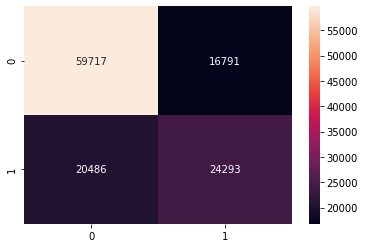

In [ ]:
C=confusion_matrix(Y_Test,Y_pred)
sns.heatmap(C,annot=True,fmt="d")

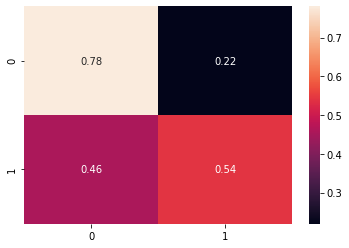

In [ ]:
#Printing recall matrix for logistic regression model - 

R=(C.T/C.sum(axis=1)).T

sns.heatmap(R,annot=True)

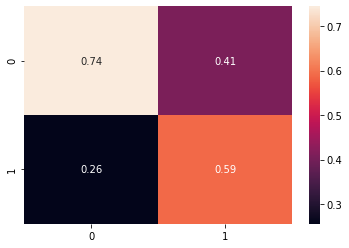

In [ ]:
#Printing precision matrix for logistic regression model - 

P=C/C.sum(axis=0)
sns.heatmap(P,annot=True)

#Conclusion-

Recall matrix states that it is correctly able to identify 78% of class 0 points out of the total points belonging to class 0   but in case of class 1, the percentage is very less compared to class 0 ie it is only able to correctly identify 54% of points out of total points belonging to class 1


Precision matrix states that out of the total predicted points of class 0 , 74% points were correctly predicted and in case of class 1 only 59% of points were only correctly classified.


Looking at these two performance matrics we can conclude that precision and recall % for class 1 is bad compared to class 0

# Training Linear SVM model - 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from tqdm import *
C1=[10**i for i in range(-5,2)]
log_loss_test_svm=[]
for j in tqdm(C1):
  print(j)
  clf=SGDClassifier(alpha=j,random_state=42)
  clf.fit(X_Train,Y_Train)
  calibarated=CalibratedClassifierCV(clf)
  calibarated1=calibarated.fit(X_Train,Y_Train)
  calibarated2=calibarated.predict_proba(X_Test)

  log_loss_test_svm.append(log_loss(Y_Test,calibarated2))

  0%|          | 0/7 [00:00<?, ?it/s]

1e-05


 14%|█▍        | 1/7 [38:01<3:48:06, 2281.13s/it]

0.0001


 29%|██▊       | 2/7 [1:15:07<3:07:25, 2249.05s/it]

0.001


 43%|████▎     | 3/7 [1:53:36<2:31:46, 2276.53s/it]

0.01


 57%|█████▋    | 4/7 [2:29:54<1:51:52, 2237.52s/it]

0.1
